<a href="https://colab.research.google.com/github/Amma-Anjali/AIML2303A52385/blob/main/Lab10-AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implement K-Means Clustering using Household Electricity Consumption Dataset.

In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
power_com = fetch_ucirepo(id=235)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [6]:
# data (as pandas dataframes)
X = power_com.data.features
y = power_com.data.targets

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
print(f"Top 5 Elecricity Consumption features:\n{power_com.data.features.sort_values(by='Date', ascending=False).head()}")



Top 5 Elecricity Consumption features:
             Date      Time Global_active_power Global_reactive_power  \
1961817  9/9/2010  02:21:00               0.238                 0.052   
1962837  9/9/2010  19:21:00               0.390                 0.132   
1962857  9/9/2010  19:41:00               2.938                 0.436   
1962856  9/9/2010  19:40:00               2.898                 0.416   
1962855  9/9/2010  19:39:00               2.886                 0.398   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1961817  239.790            1.000          0.000          1.000   
1962837  243.580            1.600          0.000          0.000   
1962857  241.510           12.200          0.000         38.000   
1962856  241.090           12.000          0.000         38.000   
1962855  241.070           12.000          0.000         38.000   

         Sub_metering_3  
1961817             1.0  
1962837             1.0  
1962857             1.0  
1962856        

In [9]:
print(f"Top 5 Voltage Consumption features:\n{power_com.data.features.sort_values(by='Date', ascending=True).tail()}")


Top 5 Voltage Consumption features:
             Date      Time Global_active_power Global_reactive_power  \
1962153  9/9/2010  07:57:00               1.430                 0.080   
1962152  9/9/2010  07:56:00               1.428                 0.076   
1962151  9/9/2010  07:55:00               1.392                 0.000   
1962149  9/9/2010  07:53:00               1.392                 0.000   
1961677  9/9/2010  00:01:00               0.808                 0.116   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1962153  239.200            6.000          0.000          1.000   
1962152  238.390            6.000          0.000          1.000   
1962151  238.050            5.800          0.000          0.000   
1962149  238.610            5.800          0.000          0.000   
1961677  246.140            3.400          0.000          0.000   

         Sub_metering_3  
1962153            18.0  
1962152            18.0  
1962151            18.0  
1962149           

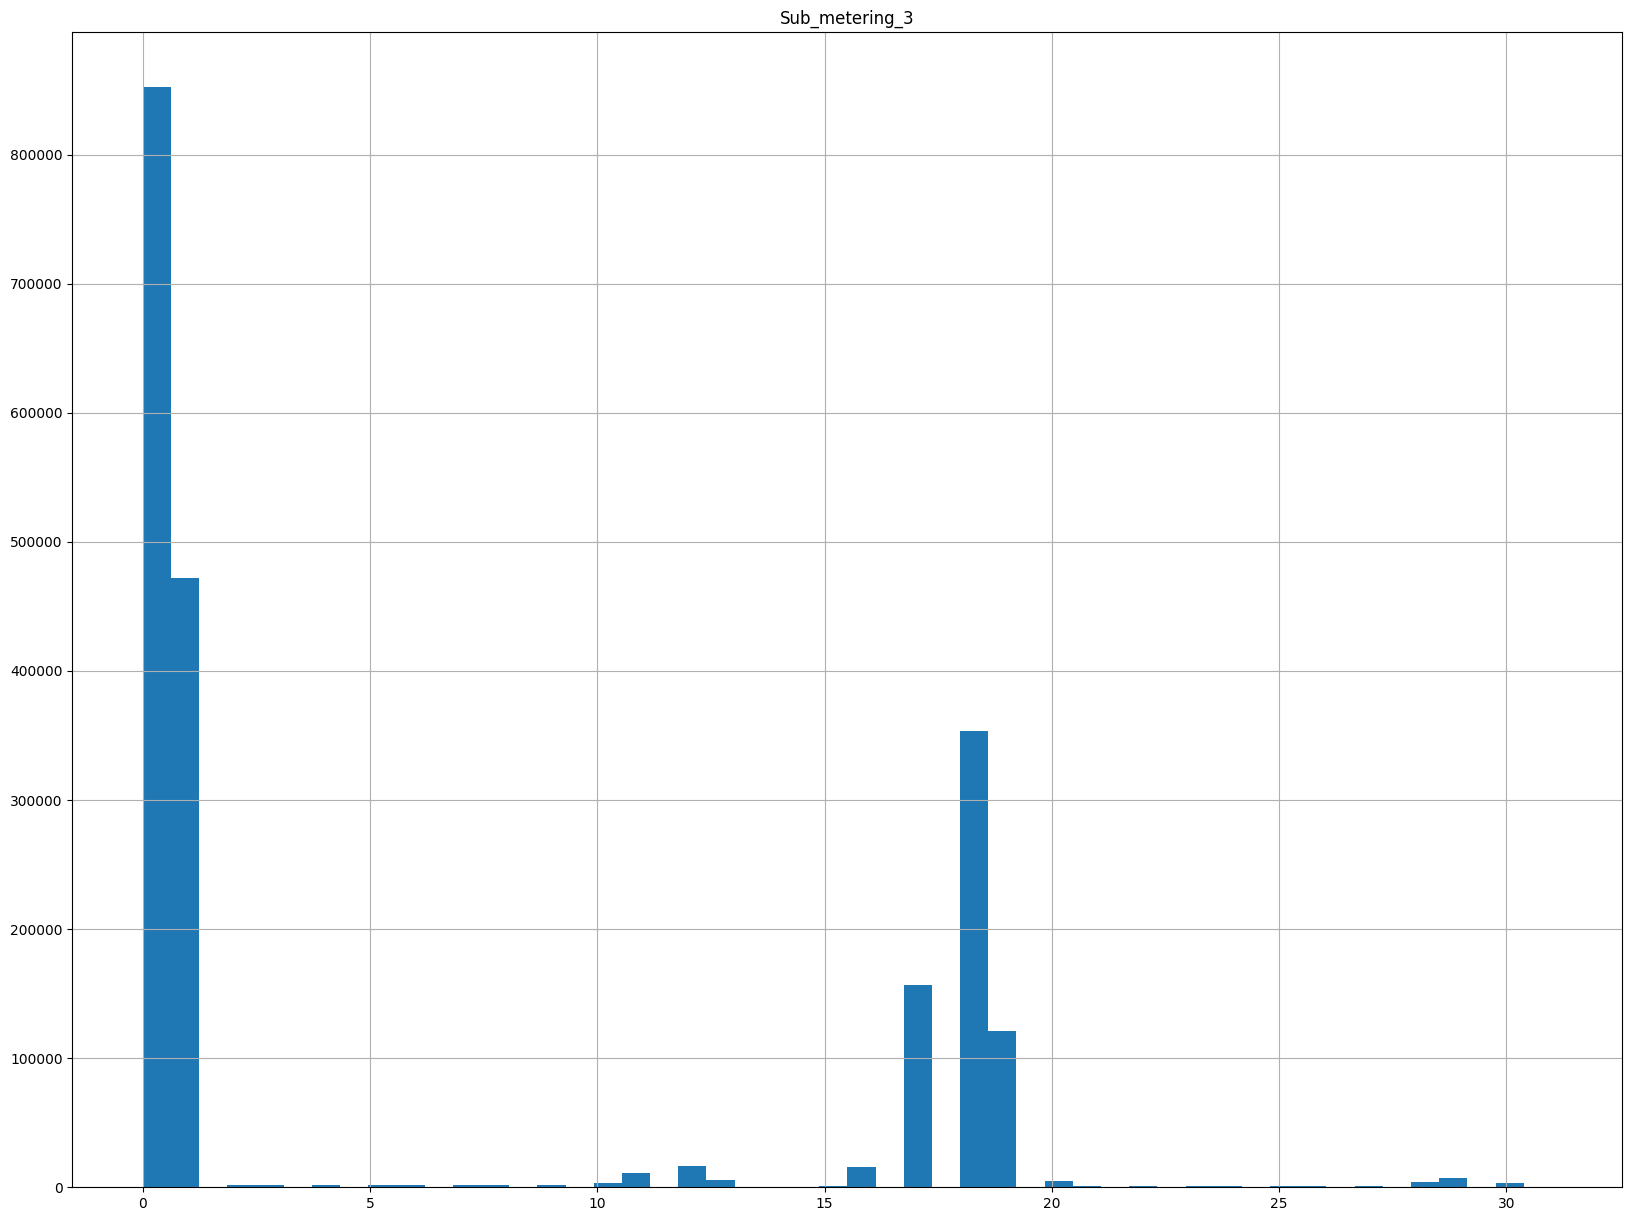

In [10]:
power_com_df = pd.DataFrame(power_com.data.features)
power_com_df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
power_com_df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [12]:
print(f"Max and Min Voltage Comsumption\n{np.max(power_com_df.Voltage.value_counts())}\n{np.min(power_com_df.Voltage.value_counts())}")


Max and Min Voltage Comsumption
25979
1


In [13]:
import sklearn
from sklearn.model_selection import train_test_split

X = power_com_df.drop(['Date','Time'], axis=1)
y = power_com_df.Voltage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
721792,0.428,0.236,245.840,2.000,0.000,0.000,1.0
1629339,0.316,0.100,245.590,1.200,0.000,0.000,1.0
1788820,1.020,0.072,242.820,4.200,0.000,0.000,1.0
290671,0.196,0.084,239.080,0.800,0.000,0.000,0.0
276338,0.206,0.092,240.270,1.000,0.000,0.000,0.0


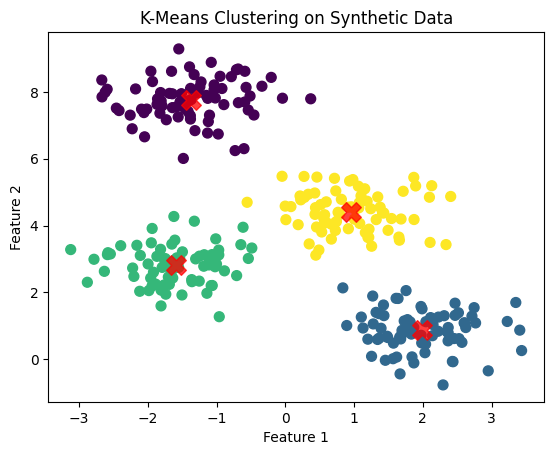

In [16]:


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 3: Import the KMeans class and fit the data

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Step 4: Visualize the fitted data by coloring the blobs by assigned label numbers
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering on Synthetic Data')
plt.show()
